### Question
Classification: Decision Tree <br>
Dataset: madfhantr.csv <br>
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan. <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [60]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [61]:
# Load the dataset
df = pd.read_csv('madfhantr.csv')

In [62]:
df = df.dropna()

In [63]:
# Visualize the first rows of the dataset
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [64]:
df.shape

(480, 13)

In [65]:
# Check for missing values in the entire dataframe
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [66]:
# Identify features and target variable
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [67]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7604166666666666


In [70]:
# Test the model on a random sample
random_sample = X.sample(1, random_state=42)
random_sample_true_label = y.loc[random_sample.index].values

random_sample_pred_label = model.predict(random_sample)

# Display the random sample, true label, and predicted label
print(f'Random Sample:\n{random_sample}\n')
print(f'True Label: {random_sample_true_label}')
print(f'Predicted Label: {random_sample_pred_label[0]}')


Random Sample:
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
92             3273             1820.0        81.0             360.0   

    Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
92             1.0          False         True       False         True   

    Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
92         False         False          True          False   

    Education_Graduate  Education_Not Graduate  Self_Employed_No  \
92               False                    True              True   

    Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
92              False                False                    False   

    Property_Area_Urban  
92                 True  

True Label: ['Y']
Predicted Label: Y


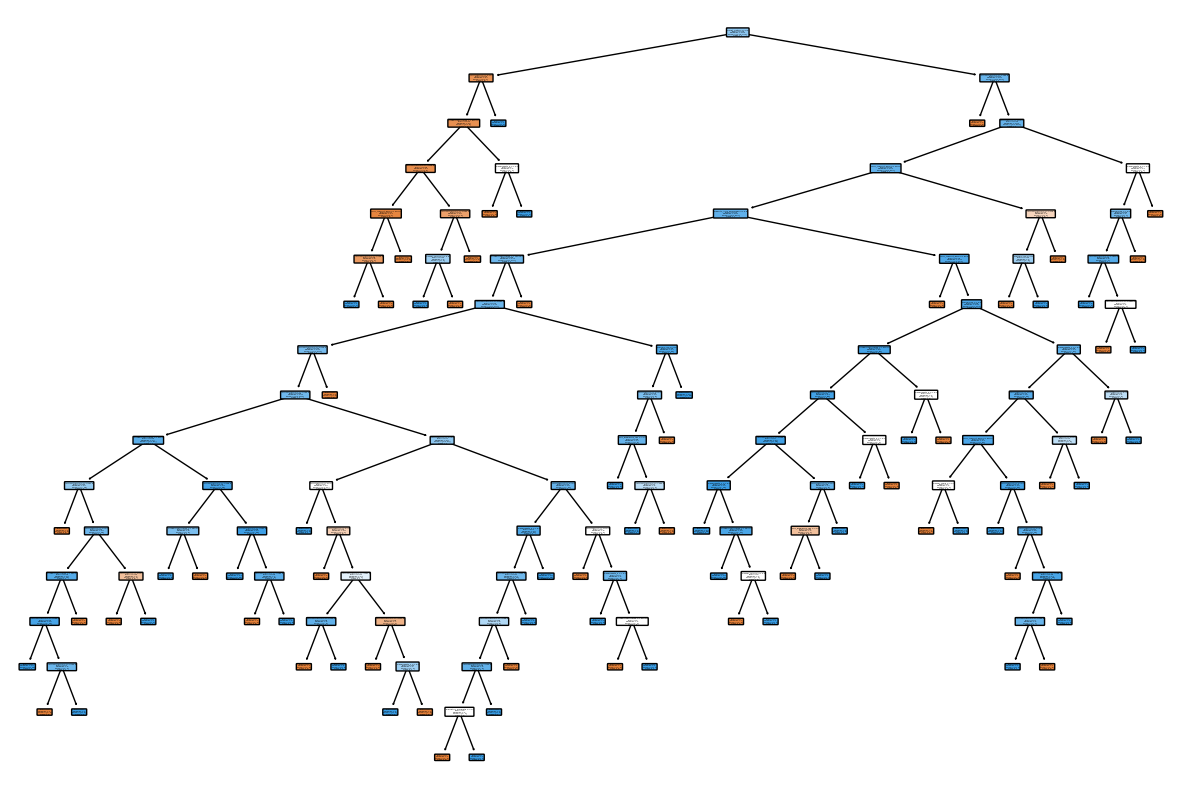

In [71]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['N', 'Y'], filled=True, rounded=True)
plt.show()